In [2]:
import pandas as pd

df = pd.DataFrame({
    "region": ["Seoul", "Busan", "Daegu", "Seoul", None],
    "age": [25, 32, None, 29, 33],
    "gender": ["M", "F", "M", "F", "F"]
})

print(df)

  region   age gender
0  Seoul  25.0      M
1  Busan  32.0      F
2  Daegu   NaN      M
3  Seoul  29.0      F
4   None  33.0      F


### [1] 매개변수 기초  
- pdf의 4~13 page

<Figure size 800x300 with 0 Axes>

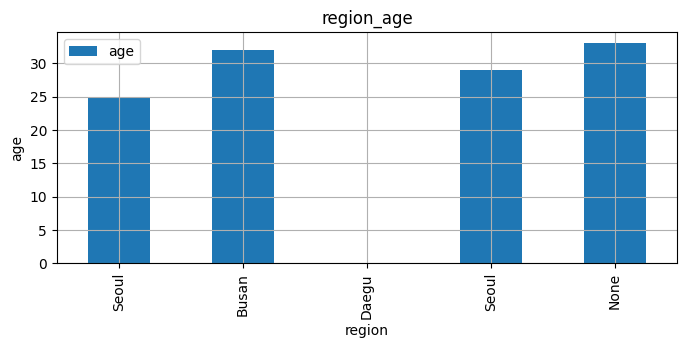

AttributeError: 'NoneType' object has no attribute 'savefig'

In [ ]:
####################################
## 매개변수 
####################################
import matplotlib.pyplot as plt

def simple_chart(df, x, y, kind='bar', title=None, figsize=(6,4)):
    #— kind 생략 시 기본 라인 그래프"""
    plt.figure(figsize=figsize)
    df.plot(x=x, y=y, kind=kind, title=title,figsize=figsize)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


x,y='region','age'
result=simple_chart(df,x,y,'bar',f'{x}_{y}',figsize=(8,3))
result.savefig('aaa.png') # 에러


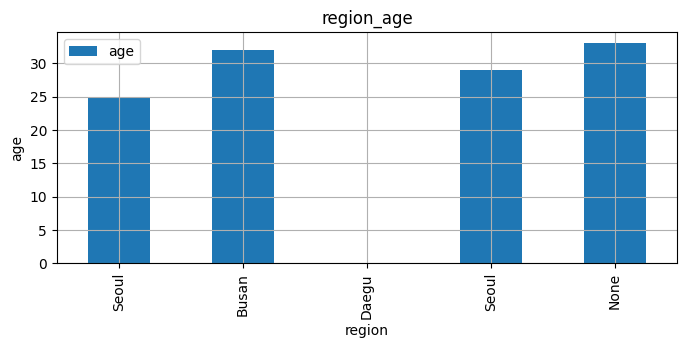

그래프 저장 완료: output.png


In [ ]:
##############################3
## 클래스로 변환
## → df는 한 번만 __init__에서 저장.
## 다양한 작업을 나누어서 저장할수 있음, save 객체도 함수안에서 리턴받아서 가능함
##############################

import matplotlib.pyplot as plt

class SimpleChart:
    def __init__(self, df):
        self.df = df

    def show(self, x, y, kind='bar', title=None, figsize=(6,4)):
        self.df.plot(x=x, y=y, kind=kind, title=title, figsize=figsize)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.grid(True)
        self.last_fig = plt.gcf()
        plt.show()

    def save(self, path, dpi=300):
        """마지막으로 그린 그래프를 파일로 저장"""
        if self.last_fig is not None:
            self.last_fig.savefig(path, dpi=dpi, bbox_inches='tight')
            print(f"그래프 저장 완료: {path}")
        else:
            print(" 저장할 그래프가 없습니다. 먼저 show()를 실행하세요.")

chart = SimpleChart(df)

x,y='region','age'
chart.show(x,y,'bar',f'{x}_{y}',figsize=(8,3))
chart.save("output.png")    # 함수로만 작업하는 함수에 plt.save 또는 리턴받아서 해야함

### [참고: 인공신경망에서의 forward 이해하기]
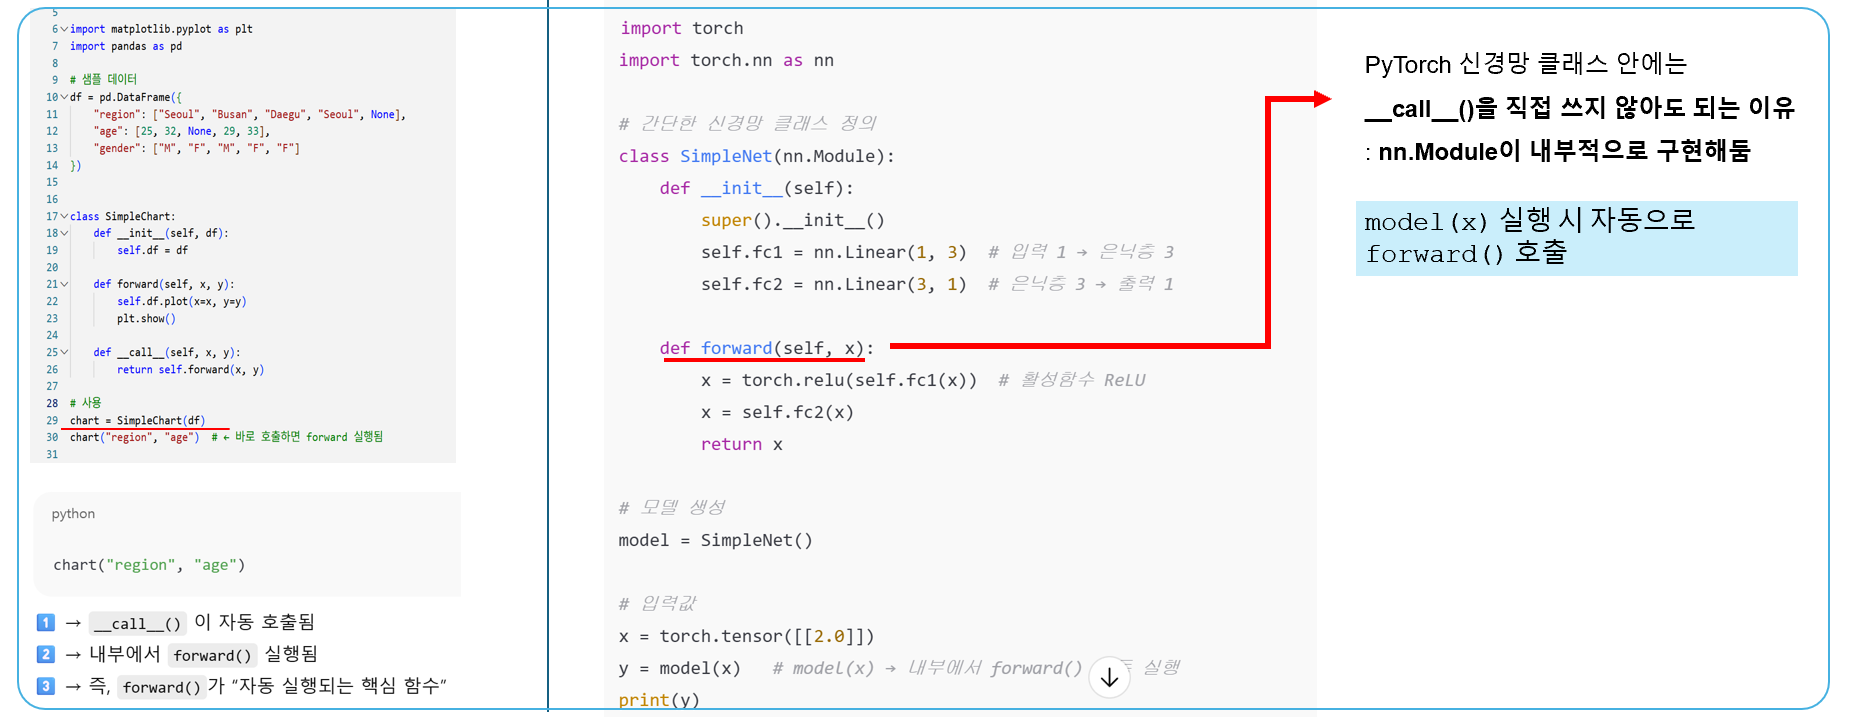

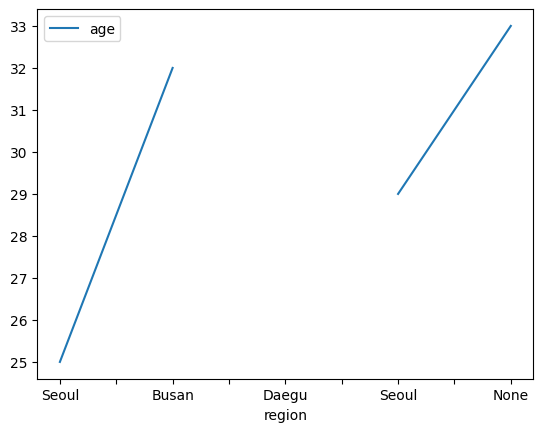

In [ ]:
##############################
## 인공신경망_forward_ 클래스로 이해
## forward()는 “객체가 호출될 때 자동으로 실행되는 실제 작업 내용” 
##############################

import matplotlib.pyplot as plt
import pandas as pd

# 샘플 데이터
df = pd.DataFrame({
    "region": ["Seoul", "Busan", "Daegu", "Seoul", None],
    "age": [25, 32, None, 29, 33],
    "gender": ["M", "F", "M", "F", "F"]
})


class SimpleChart:
    def __init__(self, df):
        self.df = df

    def forward(self, x, y):
        self.df.plot(x=x, y=y)
        plt.show()

    def __call__(self, x, y):
        return self.forward(x, y)

# 사용
chart = SimpleChart(df)
chart("region", "age")  # ← 바로 호출하면 forward 실행됨


### [2] 딕셔너리 매개변수  
- pdf의 14페이지

#### [2-1] 딕셔너리 매개변수 **kwagrs

In [57]:
import pandas as pd

# 샘플 DataFrame
df = pd.DataFrame({
    "name": ["홍길동", "부성순", "이순신"],
    "age": [25, 30, 45],
    "city": ["Seoul", "Busan", "Incheon"]
})

# **kwargs로 조건을 받아 필터링
def find_info(df, **kwargs):
    result = df.copy()
    for k, v in kwargs.items():
        result = result[result[k] == v]
    print(result)

# 실행
find_info(df, name="홍길동")


  name  age   city
0  홍길동   25  Seoul


#### [2-2] 딕셔너리 매개변수2 - json & **kwagrs

In [45]:
###########################################################
## 이 내용은 딕셔너리 구조가 json으로 저장되는걸 보여주기 위함임
#########################################################
import pandas as pd
import json

#  딕셔너리 데이터 (실제 환경에선 외부 파일로 관리)
data_dict = {
    "region": ["Seoul", "Busan", "Daegu", "Seoul", None],
    "age": [25, 32, None, 29, 33],
    "gender": ["M", "F", "M", "F", "F"]
}

#  JSON 파일로 저장
with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data_dict, f, ensure_ascii=False, indent=2)

In [ ]:
# json자료 읽어서 준비
with open("data.json", "r", encoding="utf-8") as f:
    loaded_data = json.load(f)   # dict로 복원됨


In [48]:
def analyze_data(**kwargs):
    df = pd.DataFrame(kwargs)
    print("=== 불러온 DataFrame ===")
    print(df)

    # 계산 예시
    result = {
        "평균나이": round(df["age"].mean(), 2),
        "결측지역 수": df["region"].isna().sum(),
        "여성 비율": round((df["gender"] == "F").mean(), 2)
    }

    print("\n=== 계산 결과 ===")
    print(result)
    return result
analyze_data(**loaded_data)

=== 불러온 DataFrame ===
  region   age gender
0  Seoul  25.0      M
1  Busan  32.0      F
2  Daegu   NaN      M
3  Seoul  29.0      F
4   None  33.0      F

=== 계산 결과 ===
{'평균나이': 29.75, '결측지역 수': 1, '여성 비율': 0.6}


{'평균나이': 29.75, '결측지역 수': 1, '여성 비율': 0.6}